In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice

In [10]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

def tanh_prime(x):
    return 1.0 - np.tanh(x)**2

In [14]:
class NeuralNetwork:
    def __init__(self, layers, activation='sigmoid'):
        self.layers = layers
        self.activation = sigmoid if activation == 'sigmoid' else np.tanh
        self.activation_prime = sigmoid_prime if activation == 'sigmoid' else tanh_prime
        self.weights = []
        self.error_hist = []
        
        # Weight initialization
        for i in range(1, len(layers) - 1):
            wgt = 2 * np.random.random((layers[i-1] + 1, layers[i] + 1)) - 1
            self.weights.append(wgt)
        wgt = 2 * np.random.random((layers[-2] + 1, layers[-1])) - 1
        self.weights.append(wgt)

    def fit(self, X, y, learning_rate=0.1, epochs=10000, tol=1e-2):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((X, ones.T), axis=1)
        y = np.array(y)
        report_interval = epochs // 10
        
        for k in range(epochs):
            sq_errors = []

            # forward prop for each data point
            for i in range(X.shape[0]):
                a = [X[i]]

                for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
                
                # error in step
                error = y[i] - a[-1]
                sq_errors.append(error**2)

            # rmse in epoch
            rms_error = np.sqrt(np.mean(sq_errors))
            self.error_hist.append(rms_error)
            
            if rms_error < tol:
                break
            
            # Error reporting
            if k % report_interval == 0 or k == epochs - 1:
                print(f'step: {k}')
                print('Training Results(data, prediction, expected):')
                for i in range(X.shape[0]):
                    print(f'{X[i][:2]}, {self.predict(np.array([X[i][:2]]))[0][0]}, {y[i]}')
                print(f'RMS_err: {rms_error}\n')

            # Select datapoint
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            # Forward prop
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
            
            error = y[i] - a[-1]

            # Backprop
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T) * self.activation_prime(a[l]))
            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
    
        print('NN trianing succeeded!') if rms_error < tol else print('NN training failed')

    def predict(self, x):
        a = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

step: 0
Training Results(data, prediction, expected):
[0. 0.], 0.2723503968544224, 0
[0. 1.], 0.30196366599047536, 1
[1. 0.], -0.44954713303634464, 1
[1. 1.], -0.09377005856018196, 0
RMS_err: 0.8172223040642741

step: 1000
Training Results(data, prediction, expected):
[0. 0.], 0.0009830081945323092, 0
[0. 1.], 0.9378084782893094, 1
[1. 0.], 0.9511041743538552, 1
[1. 1.], -0.0029363691764627115, 0
RMS_err: 0.03958590565896054

step: 2000
Training Results(data, prediction, expected):
[0. 0.], -0.00966738496928541, 0
[0. 1.], 0.9803447050504608, 1
[1. 0.], 0.9766835773593916, 1
[1. 1.], 0.019130446961254828, 0
RMS_err: 0.01863745232985592

step: 3000
Training Results(data, prediction, expected):
[0. 0.], 0.00021153369981479023, 0
[0. 1.], 0.985485525447495, 1
[1. 0.], 0.9859697010117582, 1
[1. 1.], -0.07709976108140237, 0
RMS_err: 0.0398495205948273

NN trianing succeeded!


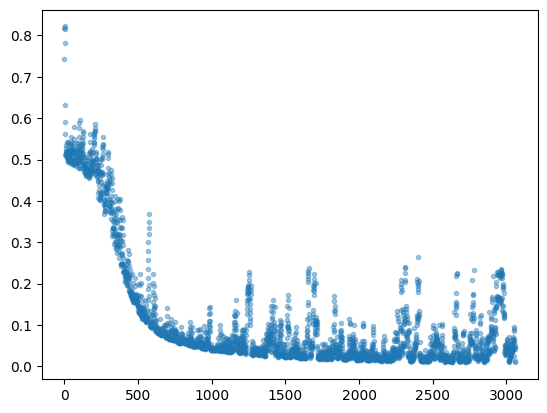

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Re-initialize and run the training with the updated model
nn = NeuralNetwork([2, 2, 1], 'tanh')
nn.fit(X, y, learning_rate=0.2, epochs=10000, tol=1e-2)

# Plot error history
x_plot = np.linspace(1, len(nn.error_hist), len(nn.error_hist))
plt.plot(x_plot, nn.error_hist, '.', alpha=0.4)

plt.show()